In [1]:
# Upper Confidence Bound

# Importing the dataset
dataset = read.csv('Ads_CTR_Optimisation.csv')


In [2]:

# Implementing UCB
N = 10000
d = 10
ads_selected = integer(0)
numbers_of_selections = integer(d)
sums_of_rewards = integer(d)
total_reward = 0
for (n in 1:N) {
  ad = 0
  max_upper_bound = 0
  for (i in 1:d) {
    if (numbers_of_selections[i] > 0) {
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = sqrt(3/2 * log(n) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    } else {
        upper_bound = 1e400
    }
    if (upper_bound > max_upper_bound) {
      max_upper_bound = upper_bound
      ad = i
    }
  }
  ads_selected = append(ads_selected, ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward
}


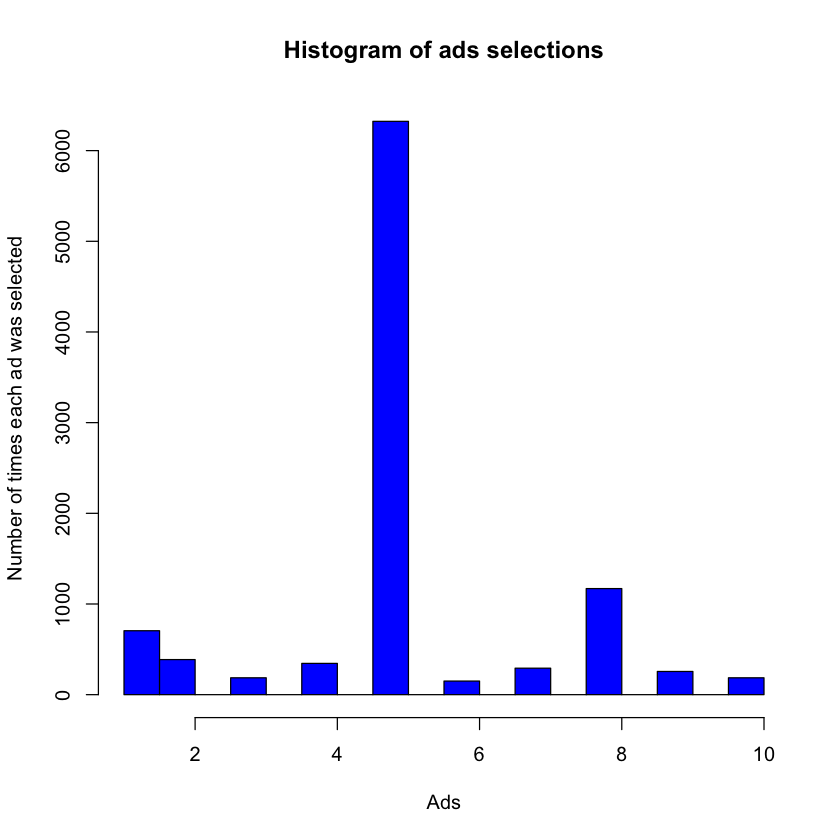

In [3]:

# Visualising the results
hist(ads_selected,
     col = 'blue',
     main = 'Histogram of ads selections',
     xlab = 'Ads',
     ylab = 'Number of times each ad was selected')